In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

# New Section

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_green_2017 =pd.read_csv('/content/drive/MyDrive/NYC/2017/combined/2017_green_combined.csv')



In [5]:
df_green_2017.head(5)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2017-01-01 00:01:15,2017-01-01 00:11:05,N,1,42,166,1,1.71,9.0,0.0,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0
1,2,2017-01-01 00:03:34,2017-01-01 00:09:00,N,1,75,74,1,1.44,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1.0
2,2,2017-01-01 00:04:02,2017-01-01 00:12:55,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0
3,2,2017-01-01 00:01:40,2017-01-01 00:14:23,N,1,255,232,1,2.11,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
4,2,2017-01-01 00:00:51,2017-01-01 00:18:55,N,1,166,239,1,2.76,11.5,0.5,0.5,0.00,0.0,NaN,0.3,12.80,2,1.0


In [6]:
df_green_2017.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11740667 entries, 0 to 11740666
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        int64  
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  ehail_fee              float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  payment_type           int64  
 18  trip_type              float64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.7+ GB


In [7]:
print("Shape of dataset = ",df_green_2017.shape)


Shape of dataset =  (11740667, 19)


In [8]:
df_green_2017.isnull().sum()



VendorID                        0
lpep_pickup_datetime            0
lpep_dropoff_datetime           0
store_and_fwd_flag              0
RatecodeID                      0
PULocationID                    0
DOLocationID                    0
passenger_count                 0
trip_distance                   0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
ehail_fee                11740667
improvement_surcharge           0
total_amount                    0
payment_type                    0
trip_type                      27
dtype: int64

In [9]:
df_green_2017.dropna()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type


In [10]:
df_green_2017.dropna(axis = 1, how ='all', inplace= True)

In [11]:
df_green_2017.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2017-01-01 00:01:15,2017-01-01 00:11:05,N,1,42,166,1,1.71,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2,1.0
1,2,2017-01-01 00:03:34,2017-01-01 00:09:00,N,1,75,74,1,1.44,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2,1.0
2,2,2017-01-01 00:04:02,2017-01-01 00:12:55,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,0.3,15.96,1,1.0
3,2,2017-01-01 00:01:40,2017-01-01 00:14:23,N,1,255,232,1,2.11,10.5,0.5,0.5,0.00,0.0,0.3,11.80,2,1.0
4,2,2017-01-01 00:00:51,2017-01-01 00:18:55,N,1,166,239,1,2.76,11.5,0.5,0.5,0.00,0.0,0.3,12.80,2,1.0


In [12]:
df_green_2017.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174067e+07,1.174064e+07
mean,1.804665e+00,1.077787e+00,1.118996e+02,1.290602e+02,1.364449e+00,2.684420e+00,1.179504e+01,3.527367e-01,4.879347e-01,1.149689e+00,1.036454e-01,2.930474e-01,1.424200e+01,1.506124e+00,1.018406e+00
std,3.964585e-01,5.625980e-01,7.588120e+01,7.723227e+01,1.039248e+00,2.828545e+00,9.875311e+00,3.891518e-01,8.339196e-02,2.173319e+00,2.662594e+00,4.924564e-02,1.151100e+01,5.245950e-01,1.344143e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.010000e+02,-8.000000e+01,-3.000000e-01,-4.800000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.750000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.115000e+01,1.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,3.300000e+00,1.450000e+01,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.694000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,6.400000e+02,6.003500e+03,3.000000e+01,8.300000e-01,4.495600e+02,7.999920e+03,3.000000e-01,8.999910e+03,5.000000e+00,2.000000e+00


In [13]:
df_green_2017.isnull().sum()


VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                27
dtype: int64

In [14]:
df_green_2017.dropna(subset = ["trip_type"],inplace= True)


In [15]:
df_green_2017.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

In [16]:
#Remove 0 passenger count .
#the taxi fare initial charge is ($2.5) ,so we are removing fare amount smaller than this amount

In [17]:
#removing outlinear values.
df_green_2017 = df_green_2017[(df_green_2017['passenger_count'] > 0)]
                              

In [18]:
df_green_2017 = df_green_2017[(df_green_2017['fare_amount'] >= 2.5)]

In [19]:
df_green_2017 = df_green_2017[(df_green_2017['trip_distance'] > 0)]

In [20]:
df_green_2017 = df_green_2017[(df_green_2017['extra'] > 0)]

In [21]:
df_green_2017 = df_green_2017[(df_green_2017['mta_tax'] > 0)]

In [22]:
df_green_2017 = df_green_2017[(df_green_2017['tolls_amount'] > 0)]

In [23]:
df_green_2017 = df_green_2017[(df_green_2017['improvement_surcharge'] > 0)]

In [24]:
df_green_2017 = df_green_2017[(df_green_2017['total_amount'] >= 2.5)]

In [25]:
df_green_2017.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,76105.000000,76105.000000,76105.000000,76105.000000,76105.000000,76105.000000,76105.000000,76105.000000,76105.0,76105.000000,76105.000000,7.610500e+04,76105.000000,76105.000000,76105.0
mean,1.817121,1.070022,123.910623,146.692688,1.420629,9.687459,31.084804,0.813330,0.5,4.098642,5.975942,3.000000e-01,42.872853,1.330556,1.0
std,0.386570,0.359905,74.528566,72.581856,1.088671,5.648839,17.470718,0.766762,0.0,5.261424,9.665448,4.204442e-13,22.233321,0.481569,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000,2.500000,0.500000,0.5,0.000000,0.010000,3.000000e-01,6.300000,1.000000,1.0
25%,2.000000,1.000000,74.000000,90.000000,1.000000,5.810000,20.000000,0.500000,0.5,0.000000,5.540000,3.000000e-01,29.560000,1.000000,1.0
50%,2.000000,1.000000,95.000000,138.000000,1.000000,8.320000,27.500000,0.500000,0.5,3.310000,5.760000,3.000000e-01,38.560000,1.000000,1.0
75%,2.000000,1.000000,174.000000,212.000000,1.000000,12.380000,38.500000,1.000000,0.5,6.910000,5.760000,3.000000e-01,51.070000,2.000000,1.0
max,2.000000,4.000000,265.000000,265.000000,6.000000,183.500000,965.000000,4.500000,0.5,449.560000,1591.080000,3.000000e-01,1612.880000,5.000000,1.0


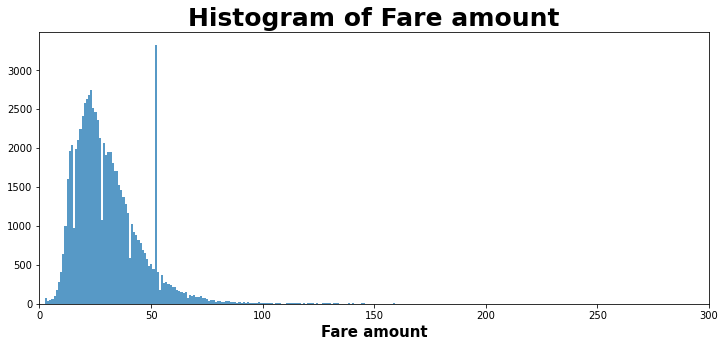

In [30]:
#target value = target amount 
plt.figure(figsize = (12,5))
n,bins,patches = plt.hist(df_green_2017.fare_amount, 1000,alpha=0.75)
plt.xlabel('Fare amount',fontsize=15,fontweight='bold')
plt.title('Histogram of Fare amount',fontsize=25,fontweight='bold')
plt.xlim(0,300)
plt.show();
